# Multiclass Classification Using Deep Learning
### Nancy Hamdan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the Data

In [ ]:
xls = pd.ExcelFile('AllStatesAndTerritoriesQTR4FY21.xlsx', engine='openpyxl')

In [ ]:
data = pd.DataFrame()

In [ ]:
for name in xls.sheet_names:
    data = pd.concat([data, xls.parse(name)])

In [ ]:
data.head()

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10,Kit,15871.59,D,1.0,2018-01-30,State
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,NaN,2016-06-02,State
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.00,C,1.0,2016-11-09,State
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,333.00,D,1.0,2016-09-14,State
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10,Each,926.00,D,1.0,2017-03-28,State


# EDA

In [ ]:
len(data)

130958

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130958 entries, 0 to 398
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   State              130958 non-null  object        
 1   Agency Name        130958 non-null  object        
 2   NSN                130958 non-null  object        
 3   Item Name          130958 non-null  object        
 4   Quantity           130958 non-null  int64         
 5   UI                 130958 non-null  object        
 6   Acquisition Value  130958 non-null  float64       
 7   DEMIL Code         130958 non-null  object        
 8   DEMIL IC           121048 non-null  float64       
 9   Ship Date          130958 non-null  datetime64[ns]
 10  Station Type       130958 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 12.0+ MB


In [ ]:
data.loc[data['DEMIL IC'].isnull(), 'DEMIL IC'] = -1

In [ ]:
data.loc[data['DEMIL IC'] == -1]

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,-1.0,2016-06-02,State
11,AL,ADAMSVILLE POLICE DEPT,5860-DS-LAS-ER00,STIMULATED COHERENT RADIATION DEVICES,12,Each,350.00,D,-1.0,2012-05-17,State
24,AL,ADAMSVILLE POLICE DEPT,1005-01-375-8167,"BARREL,SHOTGUN",3,Each,184.43,D,-1.0,2012-05-17,State
29,AL,ADAMSVILLE POLICE DEPT,1005-DS-SWE-PART,WEAPON PARTS,1,Each,50.40,D,-1.0,2012-05-17,State
30,AL,ADAMSVILLE POLICE DEPT,1005-DS-SWE-PART,WEAPON PARTS,1,Each,435.50,D,-1.0,2012-05-17,State
...,...,...,...,...,...,...,...,...,...,...,...
261,WY,SARATOGA POLICE DEPT,1005-01-D17-2240,"PISTOL, 40CAL, GLOCK GEN 3",1,Each,320.00,D,-1.0,2013-09-19,State
262,WY,SARATOGA POLICE DEPT,1005-01-D17-2240,"PISTOL, 40CAL, GLOCK GEN 3",1,Each,320.00,D,-1.0,2013-09-19,State
263,WY,SARATOGA POLICE DEPT,1005-01-D17-2240,"PISTOL, 40CAL, GLOCK GEN 3",1,Each,320.00,D,-1.0,2013-09-19,State
264,WY,SARATOGA POLICE DEPT,1005-01-D17-2240,"PISTOL, 40CAL, GLOCK GEN 3",1,Each,320.00,D,-1.0,2013-09-19,State


In [ ]:
eda_data = data.copy()
eda_data['DEMIL IC'] = eda_data['DEMIL IC'].astype(np.object)

In [ ]:
eda_data.describe(datetime_is_numeric=True)

,Quantity,Acquisition Value,Ship Date
count,130958.000000,1.309580e+05,130958
mean,4.180233,1.316023e+04,2011-09-05 01:02:48.702233088
min,0.000000,0.000000e+00,1980-01-01 09:07:07.000032
25%,1.000000,1.380000e+02,2006-05-02 00:00:00
50%,1.000000,4.990000e+02,2012-04-18 00:00:00
75%,1.000000,7.490000e+02,2017-04-17 00:00:00
max,5000.000000,2.200000e+07,2021-09-30 00:00:00
std,31.187727,1.371933e+05,NaN


In [ ]:
eda_data.describe(include=np.object)

,State,Agency Name,NSN,Item Name,UI,DEMIL Code,DEMIL IC,Station Type
count,130958,130958,130958,130958,130958,130958,130958.0,130958
unique,53,5632,10295,4797,32,7,8.0,1
top,CA,TEHAMA CSO,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",Each,D,1.0,State
freq,9489,1402,31543,46843,125920,93478,112444.0,130958


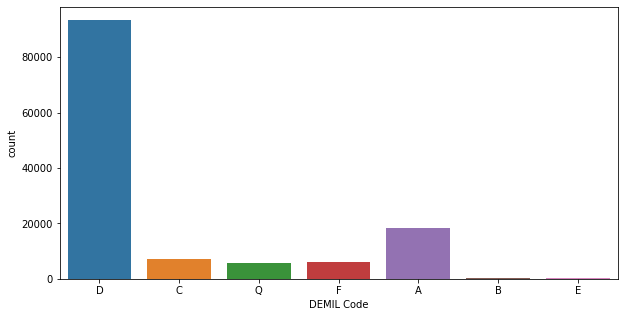

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='DEMIL Code', data=data)

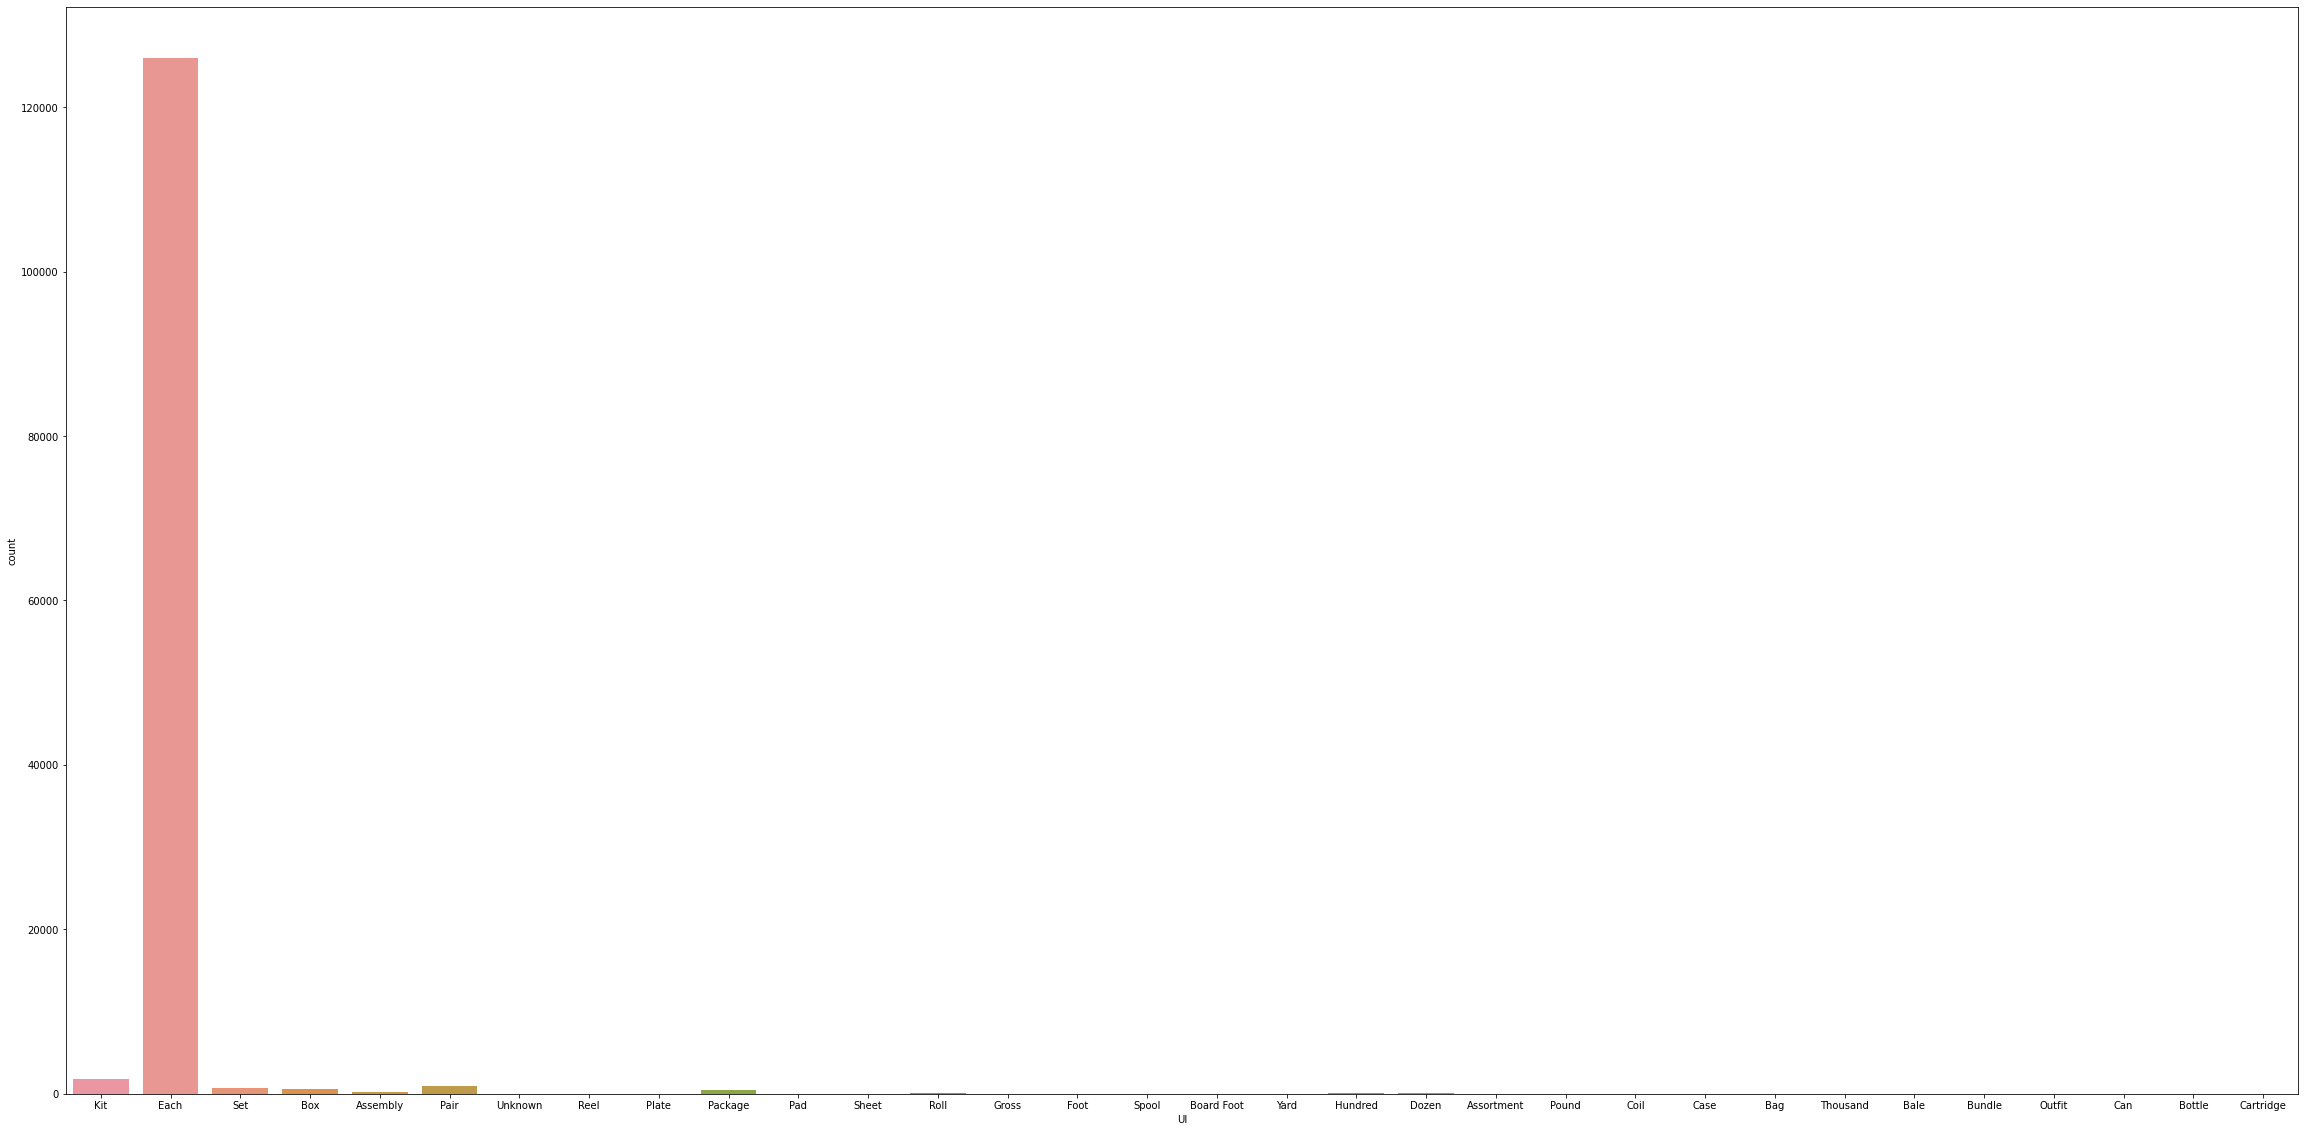

In [ ]:
plt.figure(figsize = (40,20))
sns.countplot(x='UI', data=eda_data)

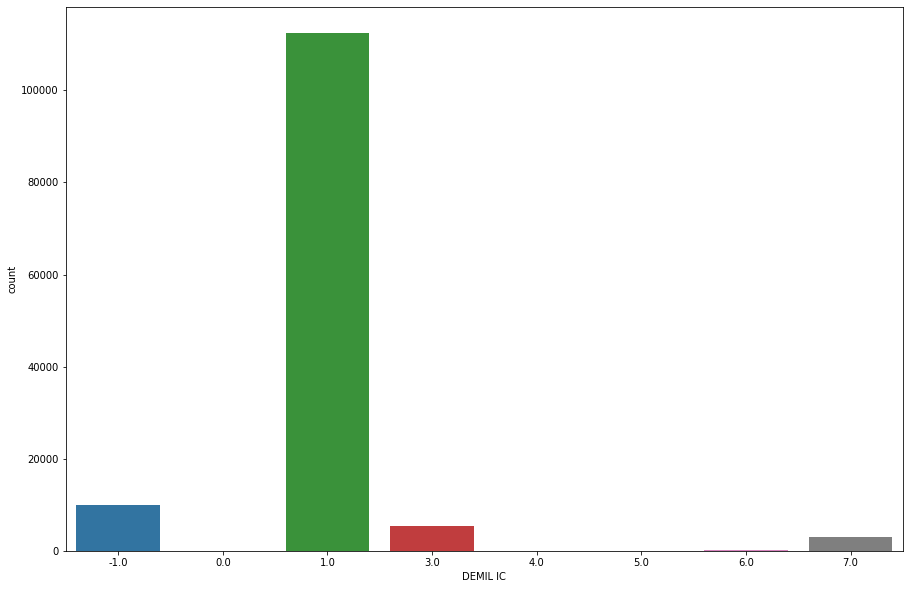

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x='DEMIL IC', data=eda_data)

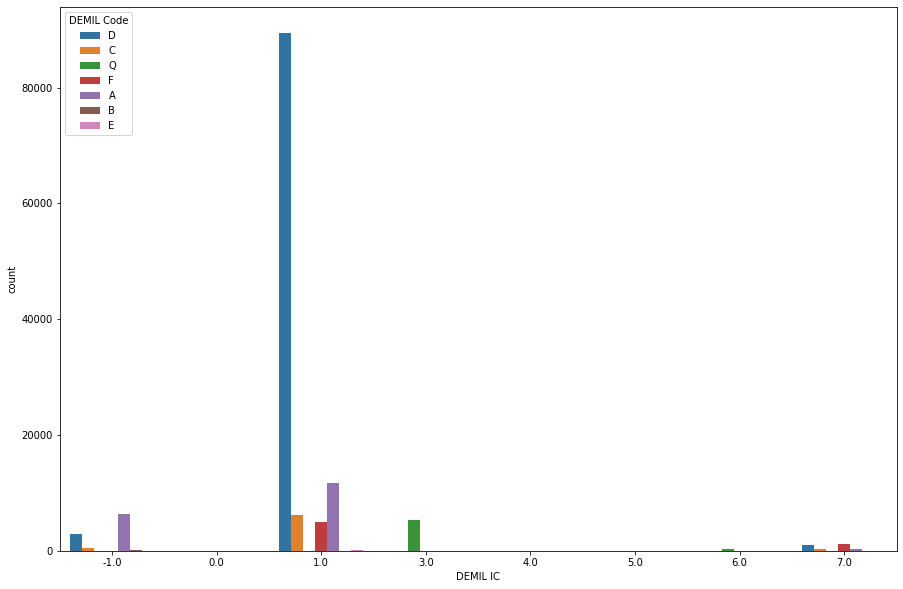

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x='DEMIL IC', data=eda_data, hue='DEMIL Code')

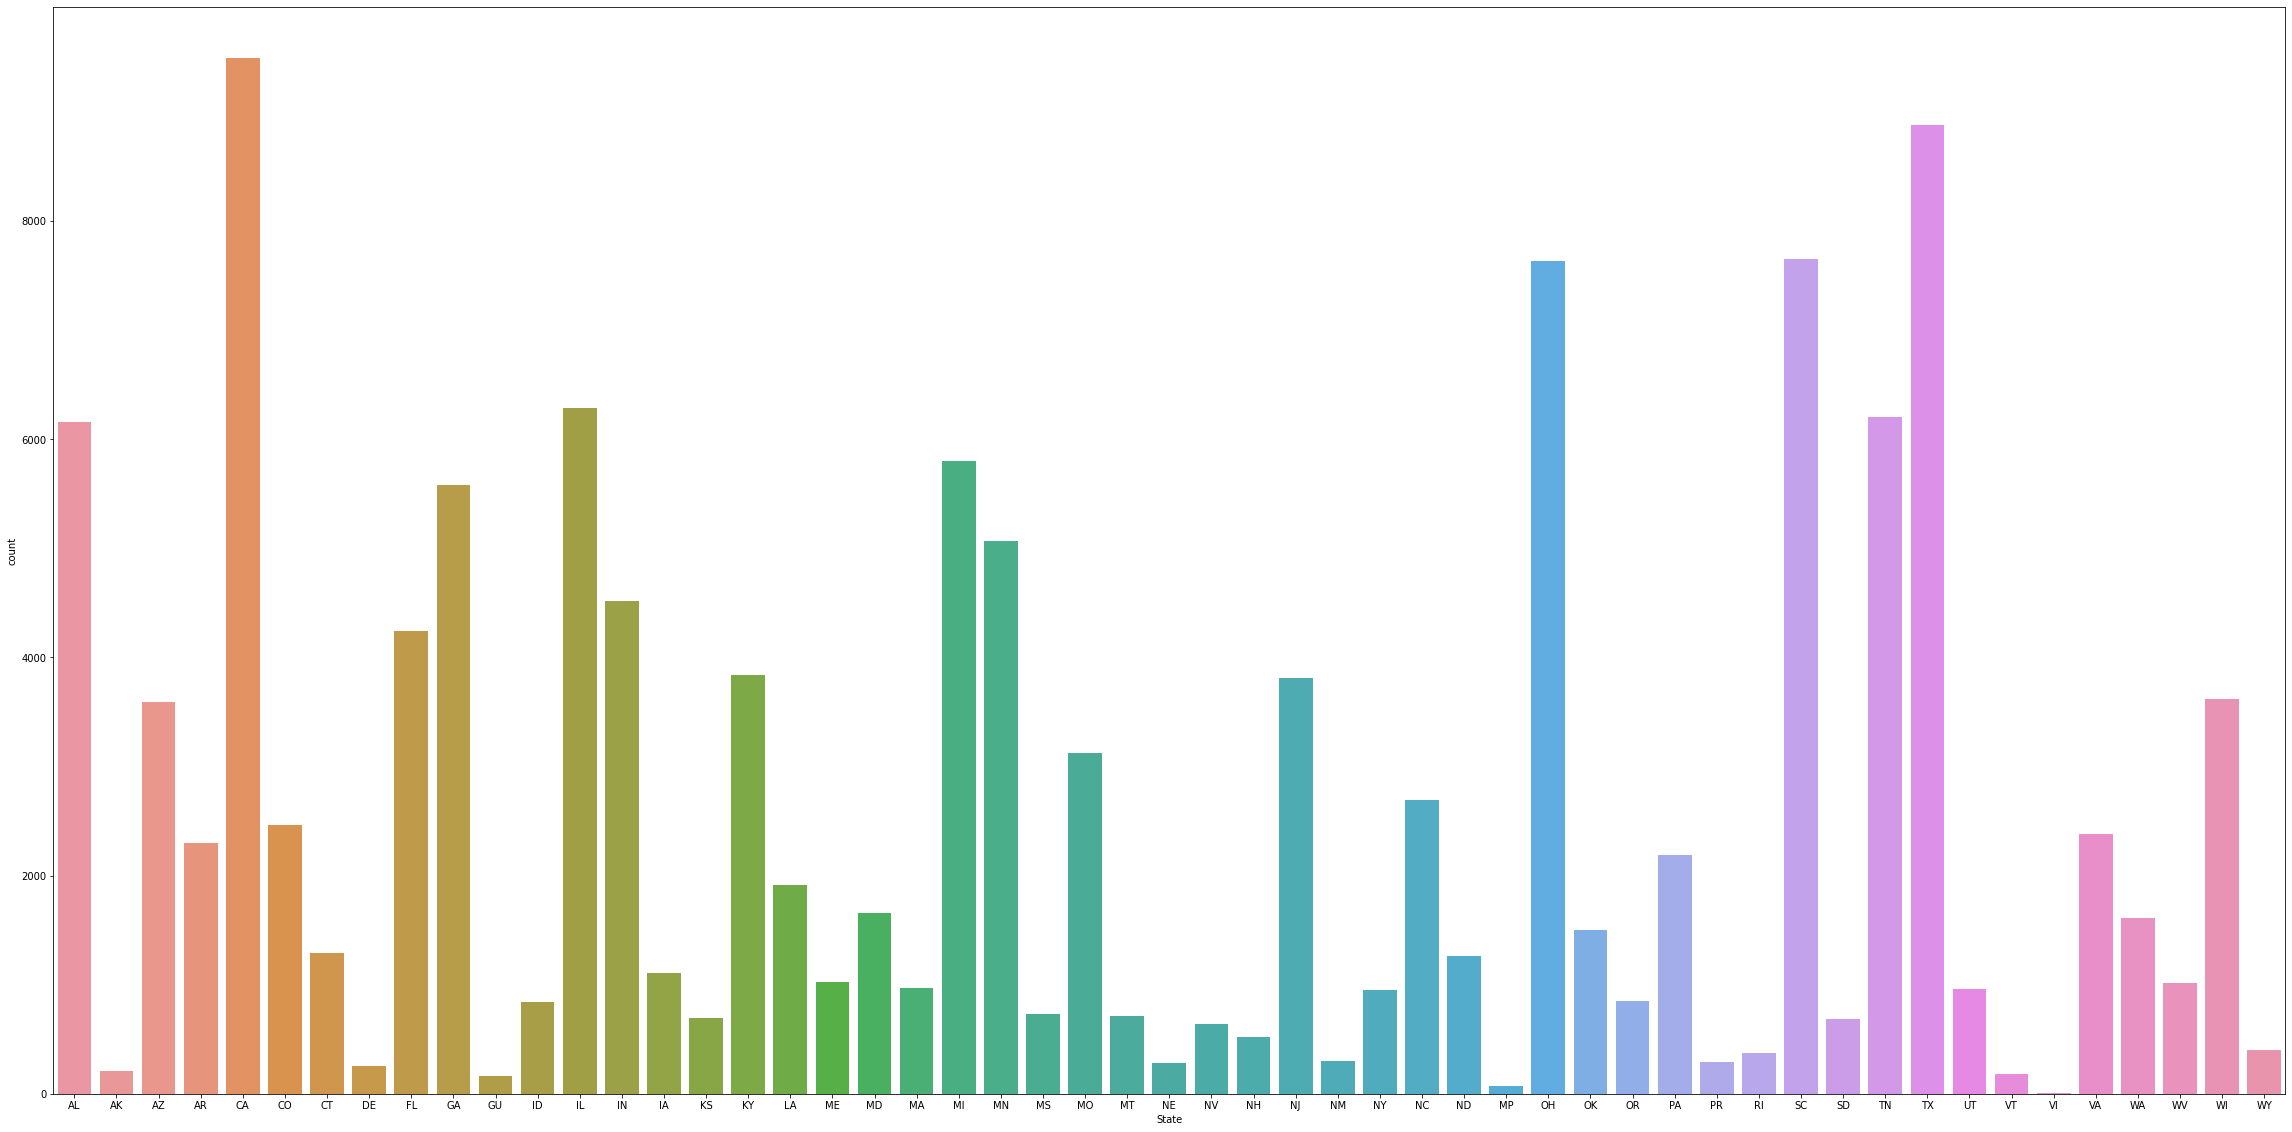

In [ ]:
plt.figure(figsize = (40,20))
sns.countplot(x='State', data=eda_data)

## Acquisition Value, Quantity and Time Series Analyses

<Figure size 1080x720 with 0 Axes>

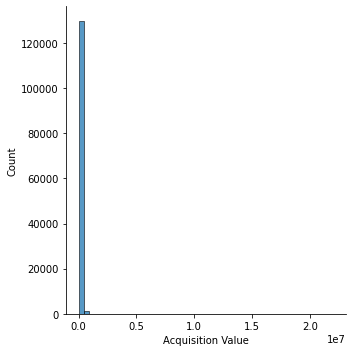

In [ ]:
sns.displot(eda_data['Acquisition Value'], bins=50)

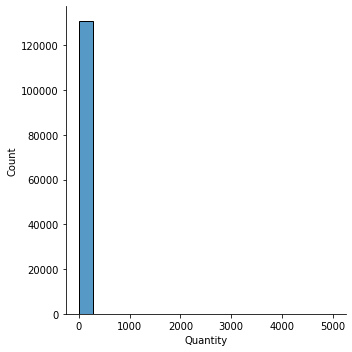

In [ ]:
sns.displot(eda_data['Quantity'])

### Time Series Analysis

In [ ]:
time_series = eda_data.set_index('Ship Date')

In [ ]:
time_series = time_series.sort_index()

In [ ]:
time_series.head()

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Station Type
Ship Date,,,,,,,,,,
1980-01-01 09:07:07.000032,NY,GREECE PD,2320-01-074-7642,"TRUCK,ARMORED",1,Each,65070.0,C,1,State
1990-05-03 00:00:00.000000,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,State
1990-05-03 00:00:00.000000,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,State
1990-05-03 00:00:00.000000,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,State
1990-05-03 00:00:00.000000,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,State


In [ ]:
time_series_yearly  = time_series.groupby(pd.Grouper(freq="Y")).sum()

In [ ]:
time_series_yearly.head()

,Quantity,Acquisition Value
Ship Date,,
1980-12-31,1,65070.0
1981-12-31,0,0.0
1982-12-31,0,0.0
1983-12-31,0,0.0
1984-12-31,0,0.0


In [ ]:
time_series_monthly  = time_series.groupby(pd.Grouper(freq="M")).sum()

In [ ]:
time_series_monthly.head()

,Quantity,Acquisition Value
Ship Date,,
1980-01-31,1,65070.0
1980-02-29,0,0.0
1980-03-31,0,0.0
1980-04-30,0,0.0
1980-05-31,0,0.0


In [ ]:
time_series_yearly_av = time_series_yearly['Acquisition Value']
time_series_yearly_q = time_series_yearly['Quantity']

In [ ]:
time_series_monthly_av = time_series_monthly['Acquisition Value']
time_series_monthly_q = time_series_monthly['Quantity']

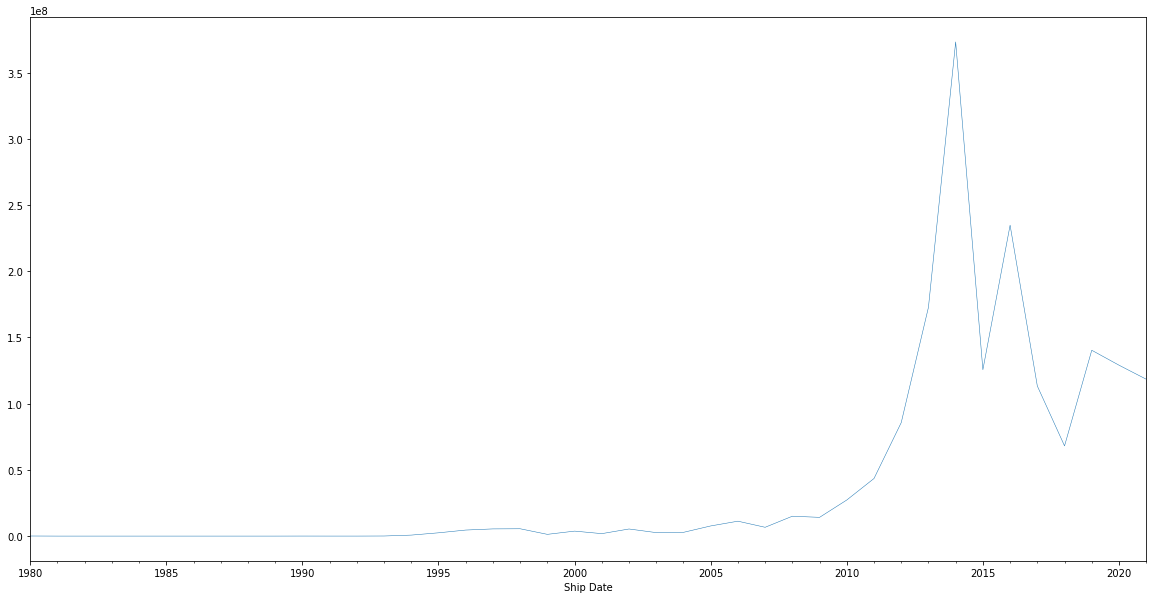

In [ ]:
time_series_yearly_av.plot(linewidth=0.5, figsize=(20,10))

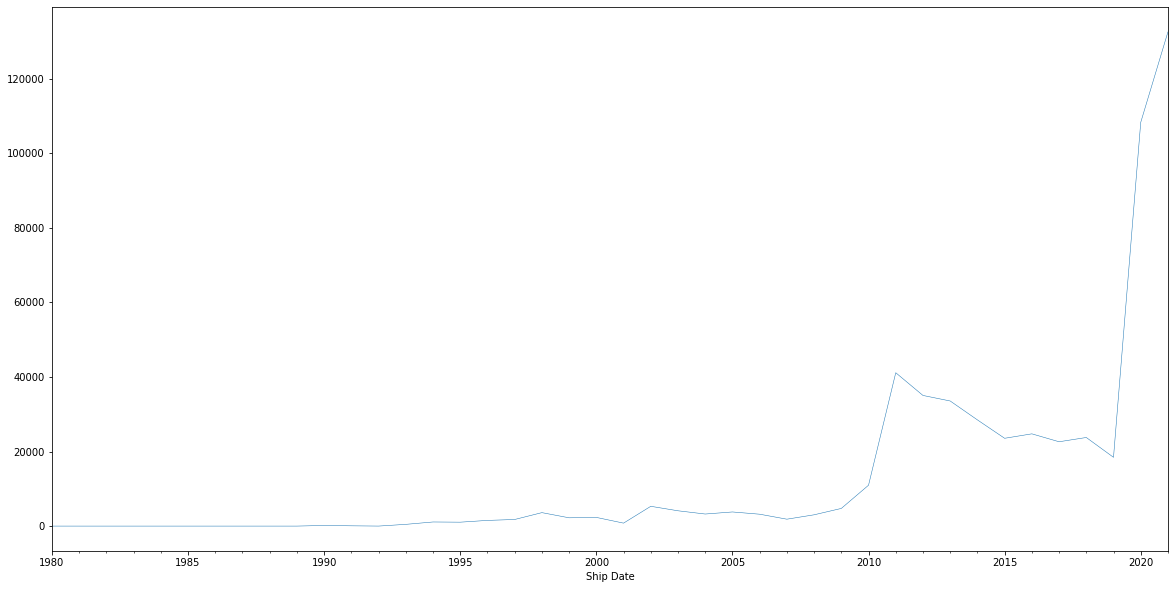

In [ ]:
time_series_yearly_q.plot(linewidth=0.5, figsize=(20,10))

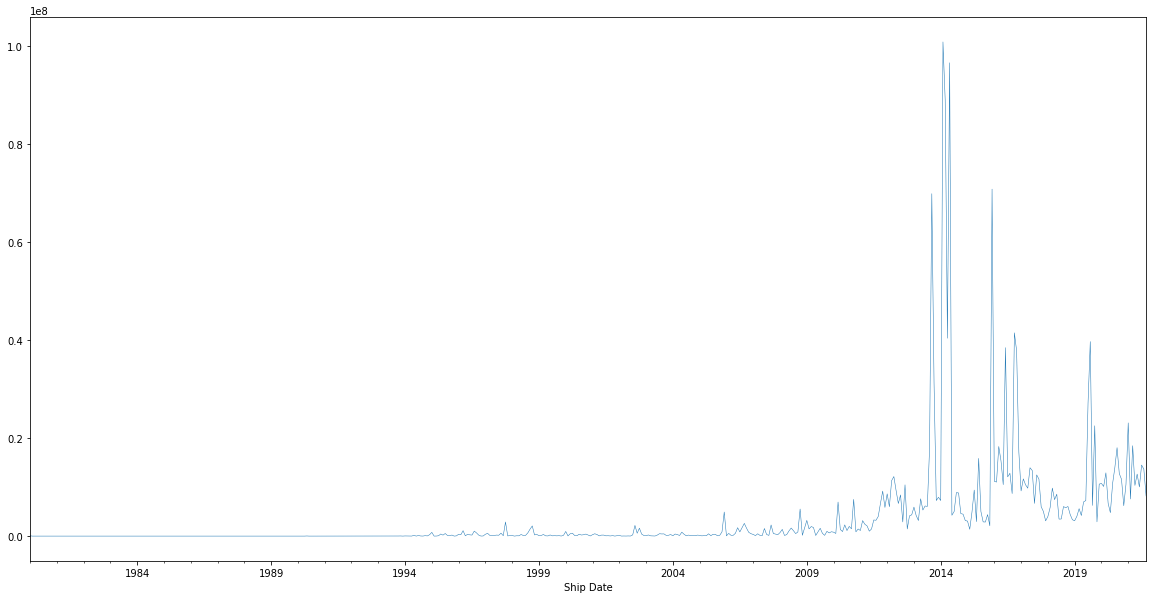

In [ ]:
time_series_monthly_av.plot(linewidth=0.5, figsize=(20,10))

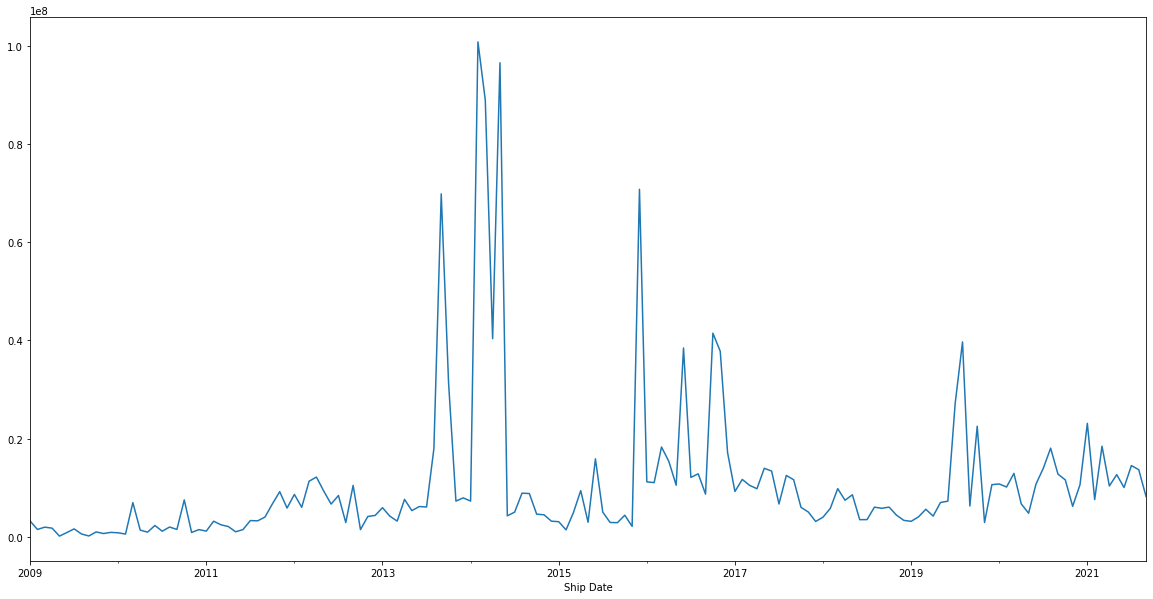

In [ ]:
time_series_monthly_av.loc[time_series_monthly_av.index.year >= 2009].plot(figsize=(20,10))

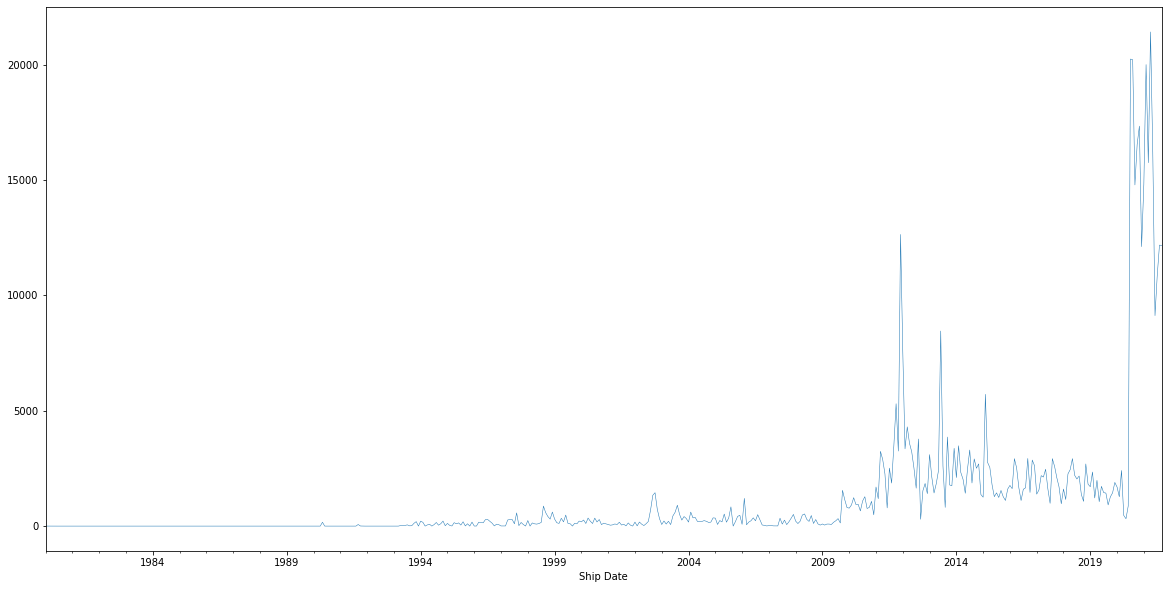

In [ ]:
time_series_monthly_q.plot(linewidth=0.5, figsize=(20,10))

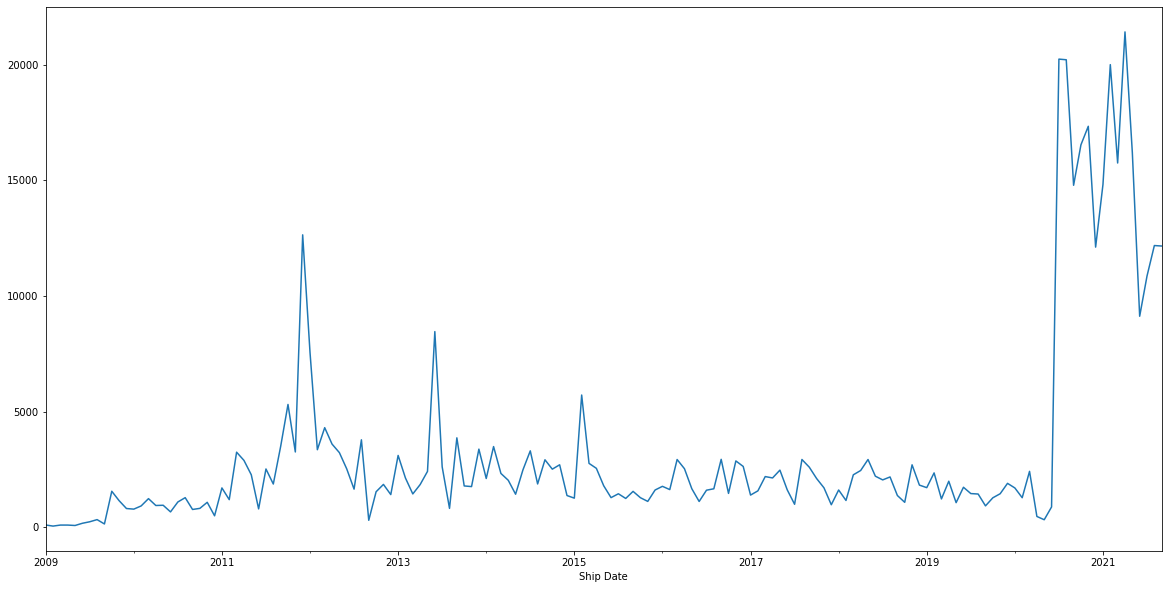

In [ ]:
time_series_monthly_q.loc[time_series_monthly_q.index.year >= 2009].plot(figsize=(20,10))

#### Smoothing Using Simple Moving Average

smoothing gives a clearer picture of the trend of the non-seasonal data

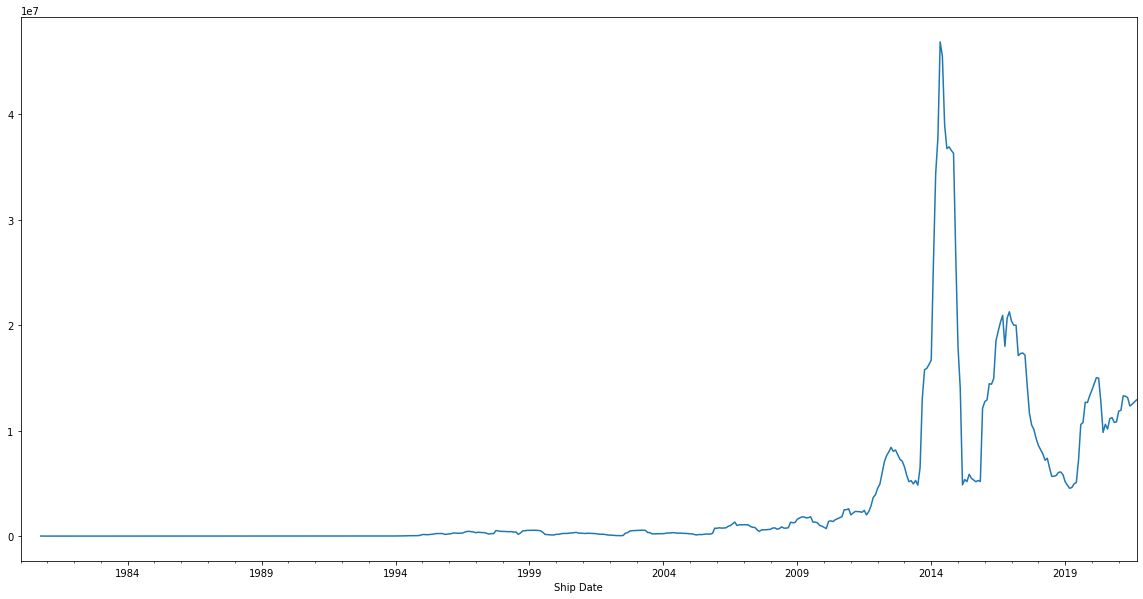

In [ ]:
monthly_av_rolling = time_series_monthly_av.rolling(window=10)
monthly_av_rolling_mean = monthly_av_rolling.mean()
monthly_av_rolling_mean.plot(figsize=(20,10))

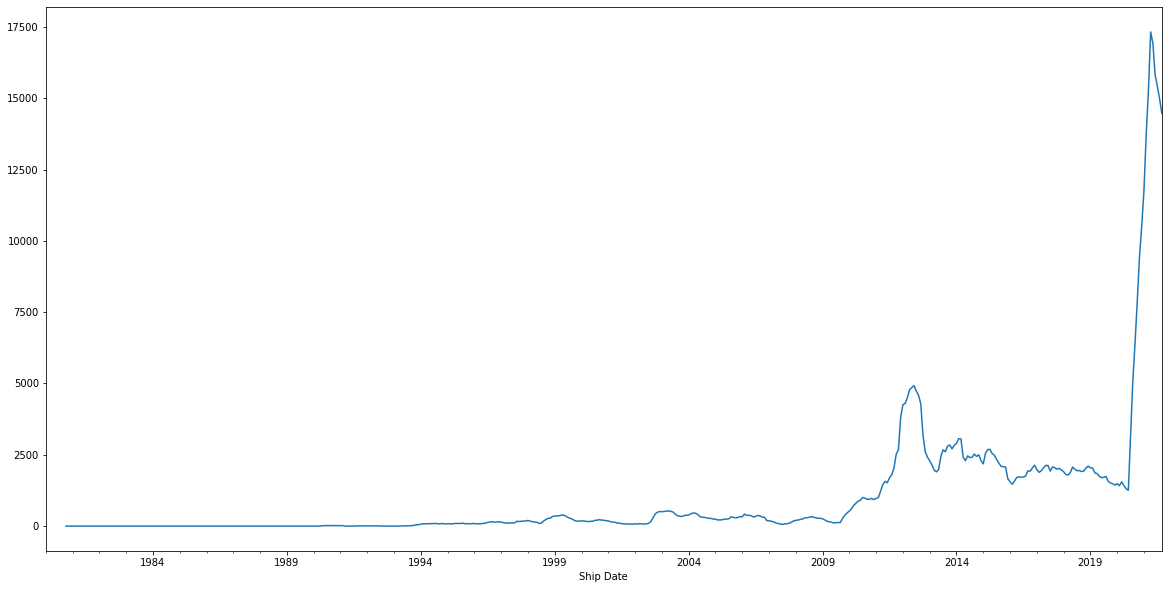

In [ ]:
monthly_q_rolling = time_series_monthly_q.rolling(window=10)
monthly_q_rolling_mean = monthly_q_rolling.mean()
monthly_q_rolling_mean.plot(figsize=(20,10))

#### Structural Breaks

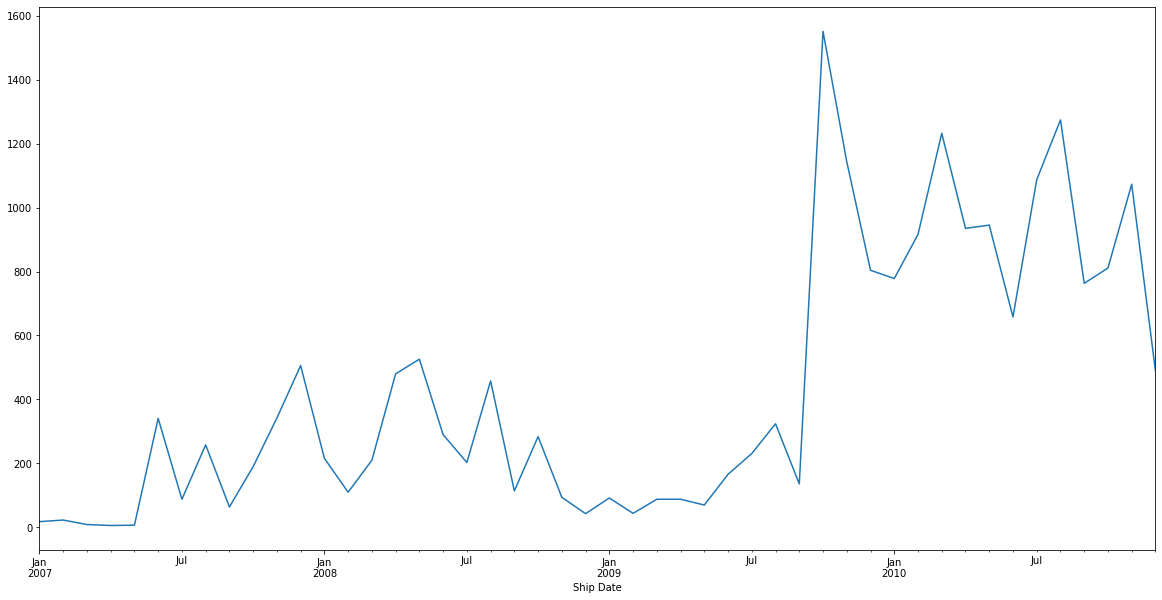

In [ ]:
time_series_monthly_q.loc[(time_series_monthly_q.index.year >= 2007) & (time_series_monthly_q.index.year < 2011)].plot(figsize=(20,10))

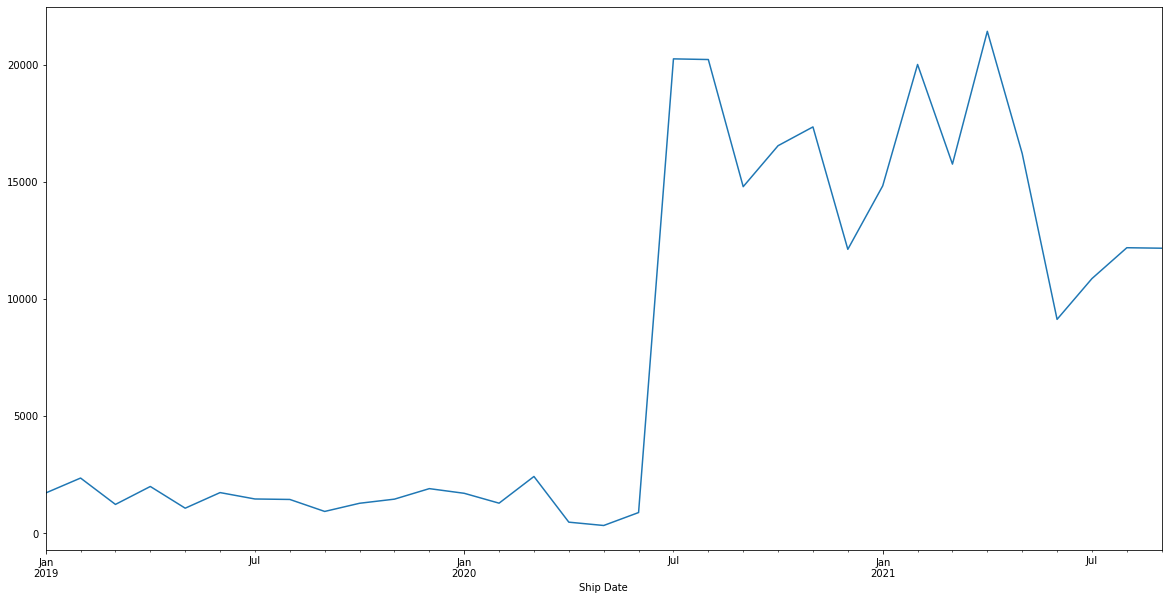

In [ ]:
time_series_monthly_q.loc[time_series_monthly_q.index.year >= 2019].plot(figsize=(20,10))

## State Related Analyses

### Top Agencies in each State

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
data.groupby('State')['Agency Name'].value_counts().groupby(level=0, group_keys=False).head(5)

State  Agency Name                        
AK     ANCHORAGE POLICE DEPARTMENT             113
       ALASKA DEPT OF PUBLIC SAFETY             73
       JUNEAU POLICE DEPARTMENT                 15
       HAINES BOROUGH POLICE DEPT                5
       FAIRBANKS POLICE DEPT                     1
AL     TUSCALOOSA POLICE DEPT                  595
       DALE COUNTY SHERIFF OFFICE              234
       OXFORD POLICE DEPT                      212
       TUSCUMBIA POLICE DEPT                   179
       HOMEWOOD POLICE DEPT                    141
AR     ARKANSAS LAW ENF TRAINING ACADEMY       172
       GRANT COUNTY SHERIFFS OFFICE            135
       NORTH LITTLE ROCK POLICE DEPT           128
       BENTON POLICE DEPARTMENT                126
       BRYANT POLICE DEPT                      120
AZ     ARIZONA DEPT OF PUBLIC SAFETY           696
       MESA POLICE DEPT                        476
       BUCKEYE POLICE DEPT                     239
       PINAL COUNTY SHERIFF OFFICE     

### Bottom Agencies in each State

In [ ]:
data.groupby('State')['Agency Name'].value_counts(ascending=True).groupby(level=0, group_keys=False).head(5)

State  Agency Name                        
AK     FAIRBANKS POLICE DEPT                   1
       NORTH POLE POLICE DEPT                  1
       HAINES BOROUGH POLICE DEPT              5
       JUNEAU POLICE DEPARTMENT               15
       ALASKA DEPT OF PUBLIC SAFETY           73
AL     BULLOCK COUNTY SHERIFF DEPT             1
       DAUPHIN ISLAND POLICE DEPT              1
       ELMORE COUNTY  SHERIFF OFFICE           1
       GARDENDALE POLICE DEPT                  1
       HAYDEN POLICE DEPARTMENT                1
AR     BAUXITE POLICE DEPT                     1
       BOONE COUNTY SHERIFF DEPT               1
       FORT SMITH POLICE DEPARTMENT            1
       HOPE POLICE DEPT                        1
       HUNTSVILLE POLICE DEPT                  1
AZ     CHANDLER POLICE DEPT                    1
       CITY OF MARICOPA POLICE DEPARTMENT      1
       EL MIRAGE POLICE DEPT                   1
       HAYDEN POLICE DEPT                      1
       SAHUARITA POLICE DE

### Top Items Ordered by each State

In [ ]:
data.groupby('State')['Item Name'].value_counts().groupby(level=0, group_keys=False).head(10)

State  Item Name                                             
AK     RIFLE,5.56 MILLIMETER                                       70
       RIFLE,7.62 MILLIMETER                                       13
       Mittens, cold weather                                        8
       LINER,WET WEATHER PONCHO                                     5
       TARPAULIN                                                    5
       UNMANNED VEHICLE,GROUND                                      5
       GLOVES,COLD WEATHER                                          4
       TROUSERS,EXTREME COLD WEATHER                                4
       PAPER,TOILET                                                 3
       SLEEPING BAG                                                 3
AL     RIFLE,5.56 MILLIMETER                                     1388
       PISTOL,CALIBER .45,AUTOMATIC                               417
       RIFLE,7.62 MILLIMETER                                      332
       SIGHT,REFLEX         

### States with Highest Quantities Ordered in each Year

In [ ]:
data.groupby([data['Ship Date'].dt.year, 'State'])['Quantity'].sum().to_frame().sort_values(by=['Ship Date','Quantity'], ascending=[True, False]).groupby(level=0, group_keys=False).head(5)

Quantity
Ship Date State          
1980      NY            1
1990      MT          167
1991      WY           69
          MO            4
1992      AZ            3
...                   ...
2021      CA        28035
          TX        12605
          AL        10507
          SC         7629
          AZ         7627

[150 rows x 1 columns]

### States with Highest Aquisition Value in each Year

In [ ]:
data.groupby([data['Ship Date'].dt.year, 'State'])['Acquisition Value'].sum().to_frame().sort_values(by=['Ship Date','Acquisition Value'], ascending=[True, False]).groupby(level=0, group_keys=False).head(5)

Acquisition Value
Ship Date State                   
1980      NY              65070.00
1990      MT              23046.00
1991      WY               9522.00
          MO                552.00
1992      AZ               7261.80
1993      KY              12420.00
          SD               8694.00
          CT               6624.00
          WY               5255.00
          ND               4968.00
1994      NV             191835.00
          CA             137761.00
          GA             101612.00
          NC              66312.00
          MO              65484.00
1995      IL             574967.00
          AL             572451.00
          GA             297182.00
          OH             170204.00
          MN             161844.00
1996      NY            1099260.00
          FL             728086.00
          CA             607255.00
          TN             401683.00
          MT             341940.00
1997      NV            2029988.00
          FL            1371405.00
          CA             498303.00
          TN             394598.00
          SC             157576.00
1998      FL             916696.00
          ID             828268.00
          IN             409364.00
          CA             369360.10
          OR             360539.00
1999      CA             374095.56
          FL             142291.49
          CO             132142.20
          NM              92566.00
          MN              85153.42
2000      FL             813429.00
          MD             465671.23
          MI             365985.13
          CO             268460.48
          WA             201125.21
2001      FL             348061.00
          CA             328714.00
          NC             205374.84
          OK             203070.00
          TN             142559.71
2002      CA            1892362.58
          WA            1405132.26
          AL             181277.48
          IL             160316.84
          IN             157997.95
2003      OH             396240.24
          FL             281163.10
          WV             244120.00
          IN             222479.34
          VA             171230.26
2004      AL             566713.00
          CA             467124.00
          TN             226879.00
          MT             145778.79
          IN             117920.37
2005      CA            4409208.00
          MD             532224.00
          IN             481981.86
          IL             299393.43
          AL             292905.00
2006      AL            2019891.69
          KY            1990046.90
          TN            1124963.92
          NC             966062.00
          SC             892771.42
2007      CA            1315798.20
          NM            1023994.00
          AL             696793.68
          WA             525070.00
          FL             425047.00
2008      CA            6123134.25
          FL            2077560.00
          WA            1089755.86
          IN             854341.05
          AL             691603.66
2009      CA            4788637.23
          IN            2062679.32
          GA            1901754.19
          LA            1252955.80
          AR             807022.00
2010      CA            7658749.63
          TX            6520957.58
          FL            2595930.66
          TN            1581847.24
          CT             927504.10
2011      CA            5034731.50
          AZ            3554830.82
          IL            3287608.34
          TN            3087692.69
          AL            2743155.25
2012      AL            8628179.06
          CA            7312548.37
          OH            5160878.17
          IL            4527654.07
          TX            4495385.38
2013      FL           12424354.30
          TX           10976850.73
          CA           10791197.89
          AL           10245192.27
          TN            9391386.85
2014      TX           44474063.82
          OH           30705992.37
          TN           2837

## Item Related Analyses

### Top Ordered Items

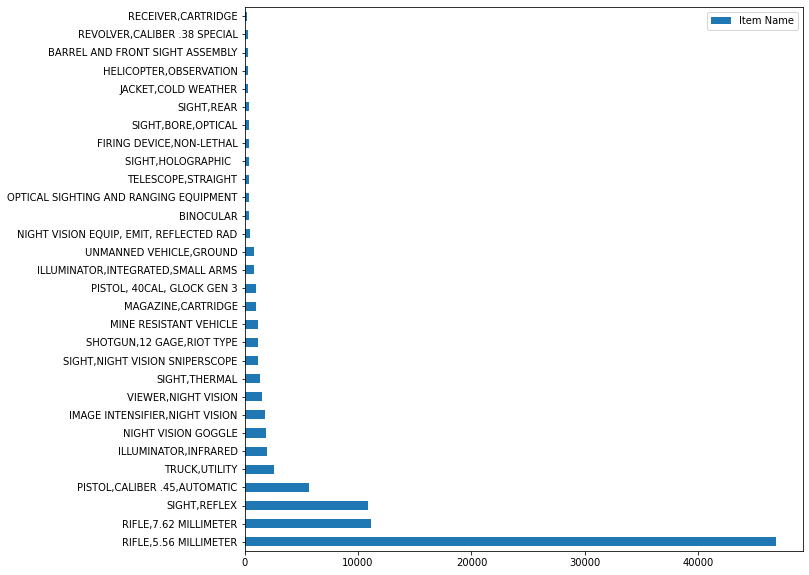

In [ ]:
data['Item Name'].value_counts().to_frame().head(30).plot.barh(figsize=(10,10))

### Top Items By Acquisition Value Transferred

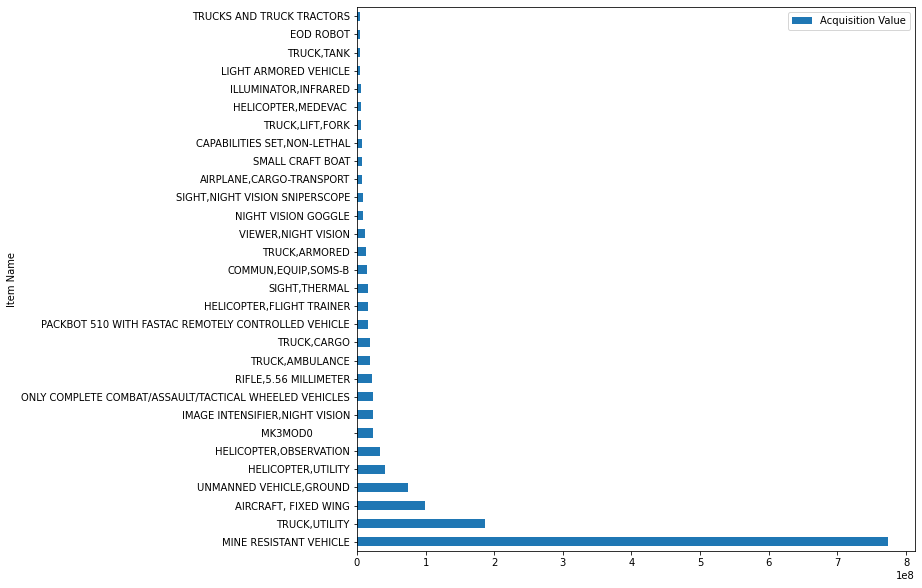

In [ ]:
data.groupby('Item Name')[['Acquisition Value']].sum().sort_values(by=['Acquisition Value'], ascending=False).head(30).plot.barh(figsize=(10,10))

### Top Items By Quantity Transferred

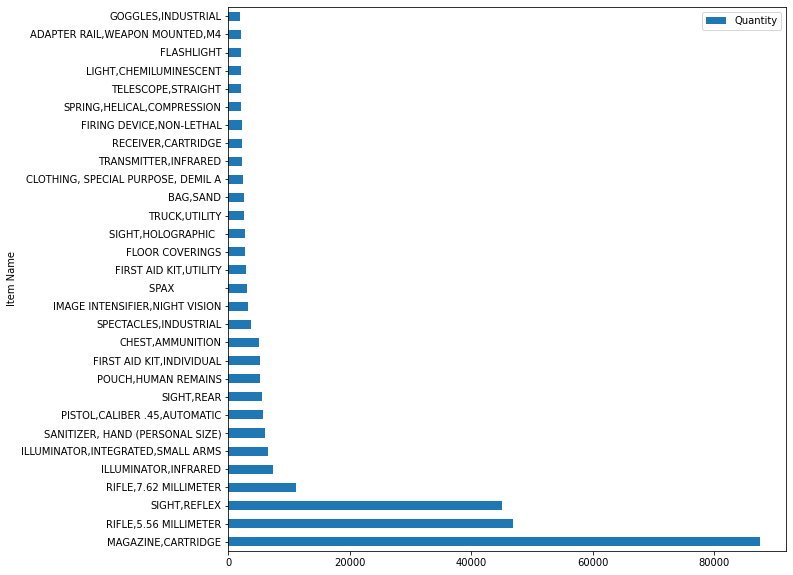

In [ ]:
data.groupby('Item Name')[['Quantity']].sum().sort_values(by=['Quantity'], ascending=False).head(30).plot.barh(figsize=(10,10))

## DEMIL Code, DEMIL IC and other Attributes

### Distribution of DEMIL IC Values Over DEMIL Code Values

In [ ]:
t = data.copy()
t['DEMIL IC_2'] = t['DEMIL IC']
pd.crosstab(index=t['DEMIL Code'], columns=t['DEMIL IC'], values=t['DEMIL IC_2'], aggfunc='count', normalize='columns')

DEMIL IC,-1.0,0.0,1.0,3.0,4.0,5.0,6.0,7.0
DEMIL Code,,,,,,,,
A,0.633502,0.023810,0.103892,0.000000,0.000000,0.0,0.0,0.121411
B,0.011806,0.023810,0.000000,0.007029,0.000000,0.0,0.0,0.000000
C,0.054188,0.023810,0.055414,0.000000,0.285714,0.0,0.0,0.082670
D,0.294753,0.857143,0.795303,0.000000,0.714286,0.0,0.0,0.374957
E,0.000303,0.000000,0.001183,0.000000,0.000000,0.0,0.0,0.002767
F,0.002624,0.000000,0.044138,0.000000,0.000000,0.0,0.0,0.418194
Q,0.002825,0.071429,0.000071,0.992971,0.000000,1.0,1.0,0.000000


### Distribution of DEMIL Code Values Over Different DEMIL IC Values

In [ ]:
t = data.copy()
t['DEMIL IC_2'] = t['DEMIL IC']
pd.crosstab(index=t['DEMIL Code'], columns=t['DEMIL IC'], values=t['DEMIL IC_2'], aggfunc='count', normalize='index')

DEMIL IC,-1.0,0.0,1.0,3.0,4.0,5.0,6.0,7.0
DEMIL Code,,,,,,,,
A,0.342835,0.000055,0.637942,0.000000,0.000000,0.000000,0.000000,0.019168
B,0.750000,0.006410,0.000000,0.243590,0.000000,0.000000,0.000000,0.000000
C,0.076583,0.000143,0.888620,0.000000,0.000570,0.000000,0.000000,0.034084
D,0.031248,0.000385,0.956664,0.000000,0.000107,0.000000,0.000000,0.011596
E,0.020833,0.000000,0.923611,0.000000,0.000000,0.000000,0.000000,0.055556
F,0.004195,0.000000,0.800742,0.000000,0.000000,0.000000,0.000000,0.195063
Q,0.004949,0.000530,0.001414,0.948745,0.000000,0.000177,0.044185,0.000000


### DEMIL Code Ordered by Total Acquisition Value Transferred

In [ ]:
data.groupby('DEMIL Code')[['Acquisition Value']].sum().sort_values(by=['Acquisition Value'])

,Acquisition Value
DEMIL Code,
E,3.426224e+04
B,2.351485e+06
F,5.618198e+07
A,8.865112e+07
Q,1.840856e+08
D,1.968024e+08
C,1.195331e+09


### DEMIL IC Ordered by Total Acquisition Value Transferred

In [ ]:
data.groupby('DEMIL IC')[['Acquisition Value']].sum().sort_values(by=['Acquisition Value'])

,Acquisition Value
DEMIL IC,
5.0,3.347000e+03
4.0,2.551941e+05
0.0,3.550394e+05
6.0,2.528442e+07
7.0,6.423735e+07
3.0,1.589664e+08
-1.0,2.014019e+08
1.0,1.272934e+09


### DEMIL Code Ordered by Total Quantity Ordered

In [ ]:
data.groupby('DEMIL Code')[['Quantity']].sum().sort_values(by='Quantity')

,Quantity
DEMIL Code,
E,803
B,1040
F,7999
C,11940
Q,26871
A,218990
D,279792


### DEMIL IC Ordered by Total Quantity Ordered

In [ ]:
data.groupby('DEMIL IC')[['Quantity']].sum().sort_values(by='Quantity')

,Quantity
DEMIL IC,
5.0,4
4.0,21
0.0,368
6.0,870
7.0,8320
3.0,26097
-1.0,64779
1.0,446976


# Data Cleaning and Feature Engineering

In [ ]:
data_clean = data.copy()

## Fixing Data Types

In [ ]:
data_clean['DEMIL IC'] = data_clean['DEMIL IC'].astype(str)

## Handling Missing Values

In [ ]:
data_clean.loc[data_clean['DEMIL IC'] == 'nan', 'DEMIL IC'] = 'Not Reviewed/No Integrity'

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130958 entries, 0 to 398
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   State              130958 non-null  object        
 1   Agency Name        130958 non-null  object        
 2   NSN                130958 non-null  object        
 3   Item Name          130958 non-null  object        
 4   Quantity           130958 non-null  int64         
 5   UI                 130958 non-null  object        
 6   Acquisition Value  130958 non-null  float64       
 7   DEMIL Code         130958 non-null  object        
 8   DEMIL IC           130958 non-null  object        
 9   Ship Date          130958 non-null  datetime64[ns]
 10  Station Type       130958 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 14.5+ MB


## Removing Erroneous Zeros

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
err_acquisition_value = data_clean[data_clean['Acquisition Value'] == 0 ]
len(err_acquisition_value)

46

In [ ]:
err_quantity = data_clean[data_clean['Quantity'] == 0 ]
len(err_quantity)

1

In [ ]:
data_clean = data_clean.drop(pd.concat([err_acquisition_value.index.to_series(), err_quantity.index.to_series()]))

## Deriving Features

In [ ]:
data_clean['ship_day'] = pd.DatetimeIndex(data_clean['Ship Date']).day
data_clean['ship_month'] = pd.DatetimeIndex(data_clean['Ship Date']).month
data_clean['ship_year'] = pd.DatetimeIndex(data_clean['Ship Date']).year

In [ ]:
data_clean.head()

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type,ship_day,ship_month,ship_year
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10,Kit,15871.59,D,1.0,2018-01-30,State,30,1,2018
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,-1.0,2016-06-02,State,2,6,2016
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.00,C,1.0,2016-11-09,State,9,11,2016
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,333.00,D,1.0,2016-09-14,State,14,9,2016
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10,Each,926.00,D,1.0,2017-03-28,State,28,3,2017


## Removing Unnecessary Columns

In [ ]:
len(data_clean[data_clean.UI == 'Each'])/len(data_clean)

0.9616427174298079

In [ ]:
features_todrop = ['Agency Name', 'NSN', 'UI', 'Station Type', 'Ship Date']

In [ ]:
data_clean = data_clean.drop(features_todrop, axis=1)

In [ ]:
data_clean.head()

,State,Item Name,Quantity,Acquisition Value,DEMIL Code,DEMIL IC,ship_day,ship_month,ship_year
0,AL,BALLISTIC BLANKET KIT,10,15871.59,D,1.0,30,1,2018
1,AL,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,245.88,D,-1.0,2,6,2016
2,AL,MINE RESISTANT VEHICLE,1,658000.00,C,1.0,9,11,2016
3,AL,"SIGHT,REFLEX",9,333.00,D,1.0,14,9,2016
4,AL,"ILLUMINATOR,INFRARED",10,926.00,D,1.0,28,3,2017


## Features Transformations

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data_clean.drop('DEMIL Code', axis=1)
y = data_clean['DEMIL Code']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

In [ ]:
categorical_features = ['State', 'Item Name', 'DEMIL IC']
numerical_features = ['Quantity', 'Acquisition Value', 'ship_day', 'ship_month', 'ship_year']

### Numerical Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x_train[numerical_features])

MinMaxScaler()

In [ ]:
x_train[numerical_features] = scaler.transform(x_train[numerical_features])
x_val[numerical_features] = scaler.transform(x_val[numerical_features])
x_test[numerical_features] = scaler.transform(x_test[numerical_features])

### Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(x_train)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
x_train_enc = ohe.transform(x_train)
x_val_enc = ohe.transform(x_val)
x_test_enc = ohe.transform(x_test)

### Encoding Target

In [ ]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [ ]:
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'Q'], dtype=object)

In [ ]:
y_train_enc = le.transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

# Building Models

In [ ]:
np.random.seed(1)

## Building a Baseline

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
forest = RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
forest.fit(x_train_enc, y_train_enc)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
forest_y_pred = forest.predict(x_test_enc)

In [ ]:
print(classification_report(y_test_enc, forest_y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3642
           1       0.75      0.36      0.49        33
           2       0.98      0.89      0.93      1386
           3       0.99      0.99      0.99     18529
           4       1.00      0.36      0.53        22
           5       1.00      0.97      0.98      1229
           6       0.99      0.98      0.99      1131

    accuracy                           0.99     25972
   macro avg       0.95      0.79      0.84     25972
weighted avg       0.99      0.99      0.99     25972



## Building ANNs

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.utils import plot_model

In [ ]:
batch = int(len(data_clean)*0.01)

### ANN Using One-Hot Encoding

In [ ]:
input = Input(shape=(x_train_enc.shape[1],))
output = Dense(7, activation='softmax')(input)
model = Model(inputs=input, outputs=output)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_enc, y_train_enc, epochs=10, batch_size=batch, verbose=2, validation_data=(x_val_enc, y_val_enc))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 7), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


69/69 - 2s - loss: 1.6104 - accuracy: 0.7077 - val_loss: 1.2925 - val_accuracy: 0.7397 - 2s/epoch - 27ms/step
Epoch 2/10
69/69 - 1s - loss: 1.0851 - accuracy: 0.7462 - val_loss: 0.9081 - val_accuracy: 0.7643 - 856ms/epoch - 12ms/step
Epoch 3/10
69/69 - 1s - loss: 0.7984 - accuracy: 0.7843 - val_loss: 0.7049 - val_accuracy: 0.8049 - 898ms/epoch - 13ms/step
Epoch 4/10
69/69 - 1s - loss: 0.6387 - accuracy: 0.8190 - val_loss: 0.5829 - val_accuracy: 0.8313 - 865ms/epoch - 13ms/step
Epoch 5/10
69/69 - 1s - loss: 0.5354 - accuracy: 0.8430 - val_loss: 0.4983 - val_accuracy: 0.8523 - 868ms/epoch - 13ms/step
Epoch 6/10
69/69 - 1s - loss: 0.4602 - accuracy: 0.8648 - val_loss: 0.4345 - val_accuracy: 0.8723 - 868ms/epoch - 13ms/step
Epoch 7/10
69/69 - 1s - loss: 0.4019 - accuracy: 0.8852 - val_loss: 0.3839 - val_accuracy: 0.8918 - 867ms/epoch - 13ms/step
Epoch 8/10
69/69 - 1s - loss: 0.3550 - accuracy: 0.9071 - val_loss: 0.3427 - val_accuracy: 0.9132 - 872ms/epoch - 13ms/step
Epoch 9/10
69/69 - 1s 

In [ ]:
y_pred_proba = model.predict(x_test_enc)
y_pred = np.argmax(y_pred_proba, axis=1) # find classes that resulted in highest probabilites

In [ ]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3642
           1       0.00      0.00      0.00        33
           2       0.99      0.62      0.76      1386
           3       0.94      1.00      0.97     18529
           4       0.00      0.00      0.00        22
           5       0.99      0.71      0.83      1229
           6       1.00      0.74      0.85      1131

    accuracy                           0.95     25972
   macro avg       0.70      0.58      0.62     25972
weighted avg       0.95      0.95      0.94     25972



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ANN Using Feature Embedding

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import StringLookup
from tensorflow.keras import layers
import math

In [ ]:
# an input layer is created for each feature, has to be a dictionary because 
# data is passed as a dictionary and this way it will be mapped to the right input layer
inputs, encoded_features = {}, [] 
for col in x_train.columns:
  if col in categorical_features:
    vocab = list(data_clean[col].unique()) # getting vocobulary of the feature

    # this is a lookup that converts strings to their right integer indices
    lookup = StringLookup(
                vocabulary=vocab,
                mask_token=None,
                num_oov_indices=0,
                output_mode="int",
            )
    
    feature_input = layers.Input(name=col, shape=(), dtype=tf.string)
    encoded_feature = lookup(feature_input) # getting the integer index of the string input
    
    embedding_dims = int(math.sqrt(len(vocab)))
    embedding = layers.Embedding(input_dim=len(vocab), output_dim=embedding_dims) # creates embedding layer for the feature

    encoded_feature = embedding(encoded_feature) # use the layer on the feature, convert index value of the feature to embedding representation
    
    encoded_features.append(encoded_feature)
    inputs[col] = feature_input
  else:
    # if feature is numeric then use as-is
    feature_input = layers.Input(name=col, shape=(), dtype=tf.float32)
    # reshaping because all layers outputs have to hava same shape and this is the shape the lookup layer outputs 
    encoded_feature = tf.expand_dims(feature_input, -1)
    
    encoded_features.append(encoded_feature)
    inputs[col] = feature_input

In [ ]:
all_features = layers.concatenate(encoded_features)
output = Dense(7, activation='softmax')(all_features)
model = Model(inputs=inputs, outputs=output)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(dict(x_train), y_train_enc, epochs=10, batch_size=batch, verbose=2, validation_data=(dict(x_val), y_val_enc))

Epoch 1/10
69/69 - 2s - loss: 1.5941 - accuracy: 0.6040 - val_loss: 1.0376 - val_accuracy: 0.9182 - 2s/epoch - 23ms/step
Epoch 2/10
69/69 - 1s - loss: 0.6719 - accuracy: 0.9338 - val_loss: 0.4409 - val_accuracy: 0.9349 - 555ms/epoch - 8ms/step
Epoch 3/10
69/69 - 1s - loss: 0.3400 - accuracy: 0.9463 - val_loss: 0.2772 - val_accuracy: 0.9439 - 559ms/epoch - 8ms/step
Epoch 4/10
69/69 - 1s - loss: 0.2265 - accuracy: 0.9545 - val_loss: 0.2114 - val_accuracy: 0.9498 - 602ms/epoch - 9ms/step
Epoch 5/10
69/69 - 1s - loss: 0.1744 - accuracy: 0.9607 - val_loss: 0.1782 - val_accuracy: 0.9517 - 594ms/epoch - 9ms/step
Epoch 6/10
69/69 - 1s - loss: 0.1453 - accuracy: 0.9624 - val_loss: 0.1585 - val_accuracy: 0.9537 - 575ms/epoch - 8ms/step
Epoch 7/10
69/69 - 1s - loss: 0.1271 - accuracy: 0.9639 - val_loss: 0.1455 - val_accuracy: 0.9560 - 590ms/epoch - 9ms/step
Epoch 8/10
69/69 - 1s - loss: 0.1149 - accuracy: 0.9649 - val_loss: 0.1362 - val_accuracy: 0.9603 - 590ms/epoch - 9ms/step
Epoch 9/10
69/69 -

In [ ]:
y_pred_proba = model.predict(dict(x_test))
y_pred = np.argmax(y_pred_proba, axis=1)

In [ ]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3642
           1       1.00      0.36      0.53        33
           2       0.81      0.82      0.82      1386
           3       0.98      0.98      0.98     18529
           4       1.00      0.36      0.53        22
           5       0.88      0.86      0.87      1229
           6       0.97      0.89      0.93      1131

    accuracy                           0.96     25972
   macro avg       0.94      0.75      0.80     25972
weighted avg       0.96      0.96      0.96     25972



## Building a DNN

### DNN Using Both One-Hot Encoding and Embedding

In [ ]:
# an input layer is created for each feature, has to be a dictionary because 
# data is passed as a dictionary and this way it will be mapped to the right input layer
def create_inputs():
  inputs = {}
  for col in x_train.columns:
    if col in categorical_features:
      inputs[col] = layers.Input(name=col, shape=(), dtype=tf.string)
    else:
      inputs[col] = layers.Input(name=col, shape=(), dtype=tf.float32)
  return inputs

In [ ]:
def encode_inputs(inputs, use_embedding):
  encoded_features = []

  for col in x_train.columns:
    if col in categorical_features:
      vocab = list(data_clean[col].unique()) # getting vocobulary of the feature

      # this is a lookup that converts strings to their right integer indices, binary means return one-hot representation
      lookup = StringLookup(
                  vocabulary=vocab,
                  mask_token=None,
                  num_oov_indices=0,
                  output_mode="int" if use_embedding else "binary"
              )
      
      if use_embedding:
        encoded_feature = lookup(inputs[col]) # getting the integer index of the string input
        embedding_dims = int(math.sqrt(len(vocab)))
        embedding = layers.Embedding(input_dim=len(vocab), output_dim=embedding_dims) # creates embedding layer for the feature
        encoded_feature = embedding(encoded_feature) # use the layer on the feature, convert index value of the feature to embedding representation
      
      else:
        encoded_feature = lookup(tf.expand_dims(inputs[col], -1)) # get one-hot encoding of feature
      
      encoded_features.append(encoded_feature)
    else:
      # if feature is numeric then use as-is
      # reshaping because all layers outputs have to hava same shape and this is the shape the lookup layer outputs
      encoded_feature = tf.expand_dims(inputs[col], -1)
      encoded_features.append(encoded_feature)

  all_features = layers.concatenate(encoded_features)

  return all_features

In [ ]:
inputs = create_inputs()
one_hot_features = encode_inputs(inputs, False)
embedded_features = encode_inputs(inputs, True)

In [ ]:
wide = Dense(20, activation='relu')(one_hot_features)
wide = Dense(10, activation='relu')(wide)
wide = Dense(20, activation='relu')(wide)
wide = layers.Dropout(0.1)(wide)

deep = Dense(20, activation='relu')(embedded_features)
deep = Dense(10, activation='relu')(deep)
deep = Dense(20, activation='relu')(deep)
deep = layers.Dropout(0.1)(deep)

merged = layers.concatenate([wide, deep])
output = Dense(units=7, activation="softmax")(merged)

model = Model(inputs=inputs, outputs=output)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(dict(x_train), y_train_enc, epochs=20, batch_size=batch, verbose=2, validation_data=(dict(x_val), y_val_enc))

Epoch 1/20
69/69 - 5s - loss: 1.3861 - accuracy: 0.6559 - val_loss: 0.6888 - val_accuracy: 0.7166 - 5s/epoch - 69ms/step
Epoch 2/20
69/69 - 3s - loss: 0.4593 - accuracy: 0.8285 - val_loss: 0.2130 - val_accuracy: 0.9545 - 3s/epoch - 46ms/step
Epoch 3/20
69/69 - 3s - loss: 0.1441 - accuracy: 0.9621 - val_loss: 0.1162 - val_accuracy: 0.9644 - 3s/epoch - 45ms/step
Epoch 4/20
69/69 - 3s - loss: 0.0990 - accuracy: 0.9677 - val_loss: 0.1018 - val_accuracy: 0.9660 - 3s/epoch - 47ms/step
Epoch 5/20
69/69 - 3s - loss: 0.0861 - accuracy: 0.9702 - val_loss: 0.0948 - val_accuracy: 0.9695 - 3s/epoch - 47ms/step
Epoch 6/20
69/69 - 3s - loss: 0.0805 - accuracy: 0.9716 - val_loss: 0.0912 - val_accuracy: 0.9682 - 3s/epoch - 47ms/step
Epoch 7/20
69/69 - 3s - loss: 0.0756 - accuracy: 0.9730 - val_loss: 0.0890 - val_accuracy: 0.9701 - 3s/epoch - 47ms/step
Epoch 8/20
69/69 - 3s - loss: 0.0722 - accuracy: 0.9734 - val_loss: 0.0867 - val_accuracy: 0.9694 - 3s/epoch - 47ms/step
Epoch 9/20
69/69 - 3s - loss: 0.

In [ ]:
y_pred_proba = model.predict(dict(x_test))
y_pred = np.argmax(y_pred_proba, axis=1)
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3642
           1       1.00      0.61      0.75        33
           2       0.89      0.85      0.87      1386
           3       0.99      0.99      0.99     18529
           4       0.92      0.50      0.65        22
           5       0.89      0.92      0.91      1229
           6       0.99      0.99      0.99      1131

    accuracy                           0.98     25972
   macro avg       0.95      0.83      0.88     25972
weighted avg       0.98      0.98      0.98     25972



## Hyperparameter Tuning

In [ ]:
data_clean['DEMIL Code'].value_counts()/len(data_clean)*100

D    71.364875
A    13.992207
C     5.359701
F     4.727472
Q     4.326264
B     0.119361
E     0.110120
Name: DEMIL Code, dtype: float64

In [ ]:
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'Q'], dtype=object)

In [ ]:
class_weight = {0:(1/13.983109) , 1:(1/0.119122), 2:(1/5.354388), 3:(1/71.380137), 4:(1/0.109959), 5:(1/4.732815), 6:(1/4.320469)}

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(dict(x_train), y_train_enc, epochs=20, batch_size=batch, verbose=2, validation_data=(dict(x_val), y_val_enc), class_weight=class_weight)

Epoch 1/20
69/69 - 5s - loss: 0.0140 - accuracy: 0.9650 - val_loss: 0.1376 - val_accuracy: 0.9486 - 5s/epoch - 70ms/step
Epoch 2/20
69/69 - 3s - loss: 0.0083 - accuracy: 0.9591 - val_loss: 0.1426 - val_accuracy: 0.9501 - 3s/epoch - 47ms/step
Epoch 3/20
69/69 - 3s - loss: 0.0076 - accuracy: 0.9590 - val_loss: 0.1463 - val_accuracy: 0.9477 - 3s/epoch - 47ms/step
Epoch 4/20
69/69 - 3s - loss: 0.0066 - accuracy: 0.9591 - val_loss: 0.1352 - val_accuracy: 0.9521 - 3s/epoch - 46ms/step
Epoch 5/20
69/69 - 3s - loss: 0.0063 - accuracy: 0.9603 - val_loss: 0.1340 - val_accuracy: 0.9519 - 3s/epoch - 46ms/step
Epoch 6/20
69/69 - 3s - loss: 0.0059 - accuracy: 0.9617 - val_loss: 0.1393 - val_accuracy: 0.9527 - 3s/epoch - 46ms/step
Epoch 7/20
69/69 - 3s - loss: 0.0059 - accuracy: 0.9618 - val_loss: 0.1571 - val_accuracy: 0.9447 - 3s/epoch - 46ms/step
Epoch 8/20
69/69 - 3s - loss: 0.0053 - accuracy: 0.9612 - val_loss: 0.1427 - val_accuracy: 0.9498 - 3s/epoch - 47ms/step
Epoch 9/20
69/69 - 3s - loss: 0.

In [ ]:
y_pred_proba = model.predict(dict(x_test))
y_pred = np.argmax(y_pred_proba, axis=1)
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3642
           1       0.16      0.88      0.27        33
           2       0.74      0.91      0.82      1386
           3       1.00      0.96      0.98     18529
           4       0.28      0.64      0.39        22
           5       0.84      0.98      0.91      1229
           6       0.99      0.98      0.99      1131

    accuracy                           0.96     25972
   macro avg       0.71      0.90      0.76     25972
weighted avg       0.97      0.96      0.96     25972

